In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1234)

In [ ]:
# If you want to have mulpitle plot, then before plot have a plt.figure().

# Some Basic example

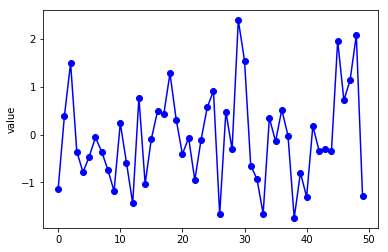

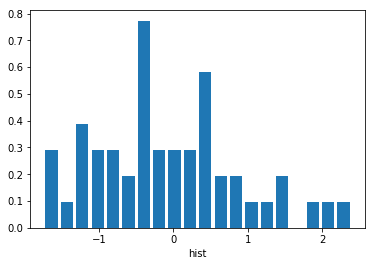

In [85]:
# single plot
np.random.seed(111)
y = np.random.randn(50)

plt.plot(y, color = 'b',marker ='o')
plt.ylabel('value')

plt.figure()
plt.hist(y, bins = 20, normed= True, rwidth=0.8)
plt.xlabel('hist')
plt.show()

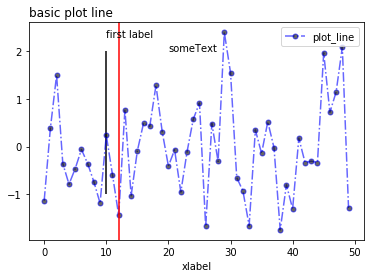

In [110]:
# more fancy plot
plt.plot(y,color = 'b', marker = 'o', linestyle ='-.',
        markersize = 5, alpha = 0.6, mfc ='black', label ='plot_line' )
plt.legend(loc='best')
plt.xlabel('xlabel')
plt.title('basic plot line',loc ='left')
plt.text(20, 2,'someText')
plt.annotate(xy =(10,2),xytext = (10,2.3),s='first label')
plt.vlines(10, -1, 2)
plt.axvline(12,color = 'r')

plt.show()

# boxplot

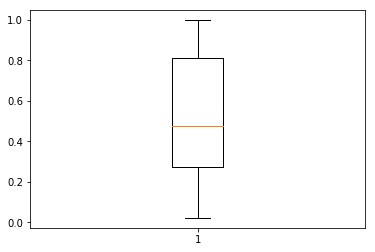

In [14]:
plt.boxplot(y)
plt.show()

plt.figure()
plt.boxplot(a)

In [31]:
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

In [17]:
data.shape

(95,)

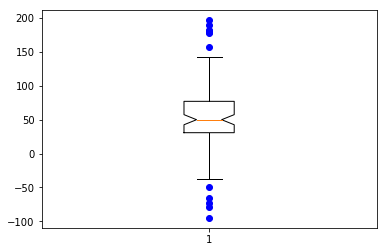

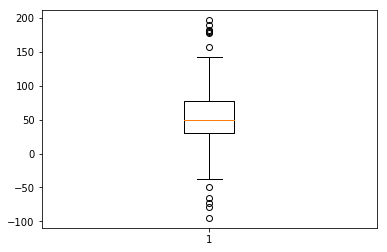

In [32]:
# notch -for center; # sym- outlier symbol 
#'bo'-blue and o
#'bs'-blue and strike
#'b+'-blue and +
# don't show outlier points: plt.boxplot(data, 0, '')

plt.boxplot(data,notch = True, sym = 'bo')


plt.figure()

plt.boxplot(data, '')
plt.show()

# PiePlot

In [53]:
y = np.array([5,6,4,7])
sum(y)
y_norm = 1.00*y/sum(y)

In [54]:
y_norm

array([ 0.22727273,  0.27272727,  0.18181818,  0.31818182])

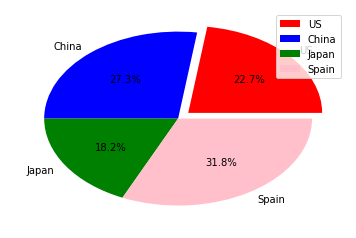

In [69]:
labels = ['US','China','Japan','Spain']
explode = [0.1,0,0,0] # explode US
plt.pie(y_norm, labels= labels, colors =['r','b','g','pink'], explode= explode,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()


# bar plot

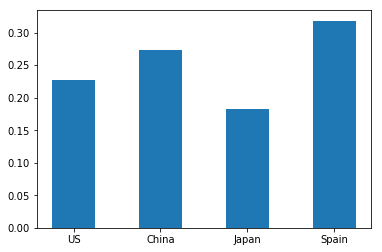

In [78]:
# bar plot
labels = ['US','China','Japan','Spain']
x = range(len(y_norm))

#width: to change bar width ( 1.0 no gap,)
plt.bar(x,y_norm, width= 0.5)
plt.xticks(x, labels)
plt.show()

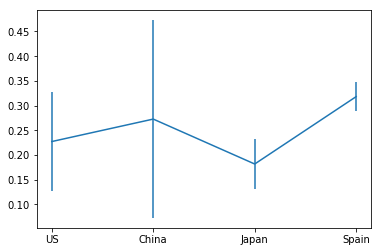

In [77]:
# error bar plot
labels = ['US','China','Japan','Spain']
error = [0.1,0.2,0.05,0.03]
x = range(len(y_norm))
plt.errorbar(x,y_norm,yerr=error)
plt.xticks(x, labels)

plt.show()

# Scatterplot

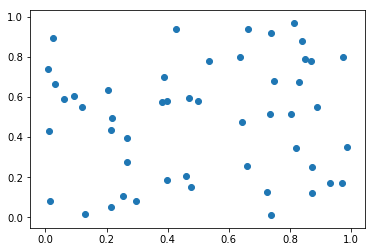

In [80]:
plt.scatter(np.random.rand(50), np.random.rand(50))
plt.show()

In [84]:
np.arange(2, 5, 0.5)

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

# Exploring data

In [115]:
data = pd.read_csv('titanic_train.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [118]:
data.dtypes # list data type for each column

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [112]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
# no duplicates
data.duplicated().sum()
# there are nan values in Age, Cabin and Embarked
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [131]:
data.loc[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [135]:
# remove Embarked two missing rows
data = data[data.Embarked.notnull()]

In [239]:
# imputation: replace na with median value for age
median_age = data.Age.dropna().median()
data.Age = data.Age.fillna(median_age)

In [241]:
data.Age.isnull().sum()

0

# Feature 1) survived

In [247]:
data.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [151]:
data.Survived.value_counts(normalize= True, dropna= True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [156]:
x = data.Survived.value_counts(normalize= True, dropna= True).index.tolist()
y = data.Survived.value_counts(normalize= True, dropna= True).values

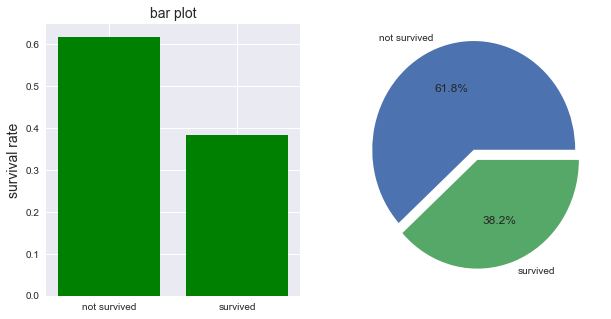

In [169]:
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize= (10,5))
labels = ['not survived','survived']

ax[0].bar(x, y, color = 'g')
ax[0].set_title('bar plot', fontsize = 14)
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('survival rate',fontsize = 14)

ax[1].pie(y, labels = labels , autopct='%1.1f%%', explode =[0.1, 0] )

plt.show()

# Feature 2) Pclass

In [136]:
# let's take a look at feature Pclass
len(np.unique(data.Pclass)) # 3 classes
np.unique(data.Pclass) # they are 1, 2, 3 classes

array([1, 2, 3])

In [144]:
a = data.Pclass.value_counts(normalize= True) # percentage in each class
a

3    0.552306
1    0.240720
2    0.206974
Name: Pclass, dtype: float64

In [140]:
data.groupby('Pclass').size()

Pclass
1    214
2    184
3    491
dtype: int64

In [141]:
import seaborn as sns

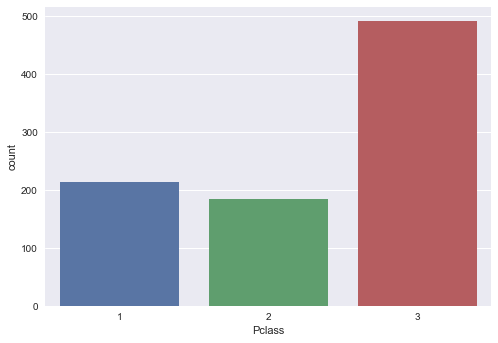

In [143]:
sns.countplot(x ='Pclass', data = data)
sns.despine()

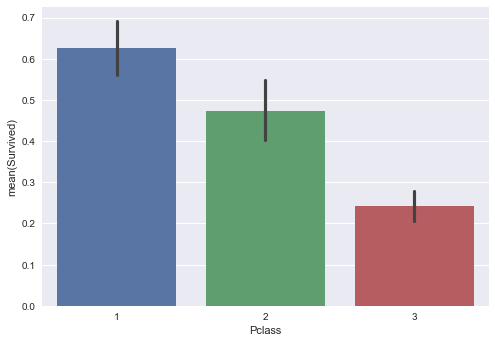

In [148]:
sns.barplot(x= 'Pclass', y ='Survived', data= data)
sns.despine()

# for two catergorical variables 
<font color = 'red'>pivot table and stacked bar plot are good to way to try</font>

In [236]:
a = pd.pivot_table(data = data, columns = 'Survived', index= 'Sex',
               values= 'PassengerId', aggfunc ='count')
a

Survived,0,1
Sex,,
female,81,231
male,468,109


In [237]:
female= data[data.Sex == 'female' ].Survived.value_counts(sort = False)
male= data[data.Sex == 'male'].Survived.value_counts(sort = False)


    #example for bar_stacked
    https://matplotlib.org/examples/pylab_examples/bar_stacked.html

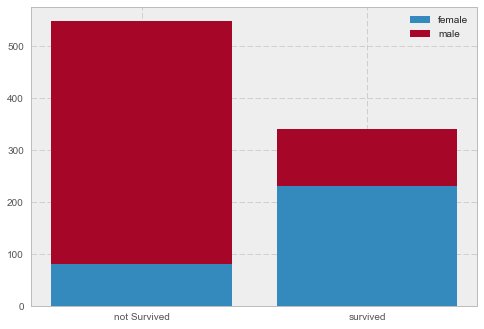

In [238]:
plt.bar(female.index,female, label ='female')
plt.bar(male.index,male,bottom = female, label = 'male')

plt.xticks(range(2),['not Survived','survived'])
plt.legend()
plt.show()

# Feature 3) Fare

In [192]:
data.Fare.max()

512.32920000000001

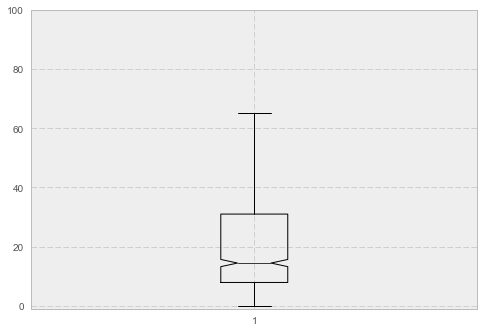

In [196]:
plt.boxplot(data.Fare, notch = True)
plt.ylim(-1,100)
plt.show()

In [185]:
plt.style.use('bmh')

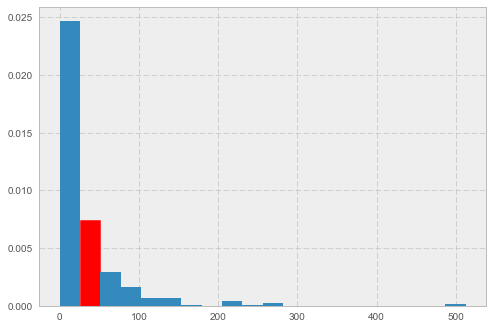

In [197]:
v1, v2, v3 = plt.hist(data.Fare, bins = 20, normed= True)
v3[1].set_color('red')
plt.show()

# Feature 4) Age
<font color = 'red'>--use boxplot to handle outlier</font>

In [198]:
y = data.Age.dropna().values

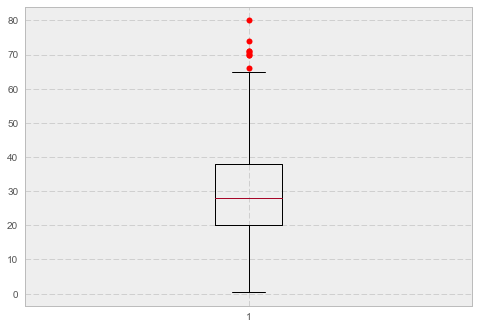

In [202]:
plt.boxplot(y,sym = 'ro')
plt.show()
# then replace outlier to a specific value

In [205]:
data.Age.quantile(np.linspace(0.9,0.99,3))

0.900    50.00
0.945    55.00
0.990    65.89
Name: Age, dtype: float64

In [209]:
# replace outlier to 0.99 percentile
value = data.Age.quantile(0.99)
data[data.Age > value]['Age']

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [215]:
# this is to replace value with new value
data.loc[data.Age > value,'Age'] = value
data.loc[96]['Age']

65.889999999999986

# Two continous variables : Age v.s. Fare

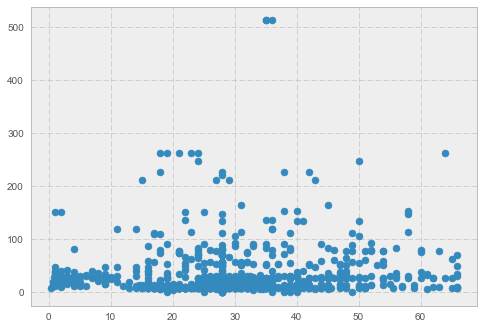

In [242]:
plt.scatter(data.Age, data.Fare)
plt.show()

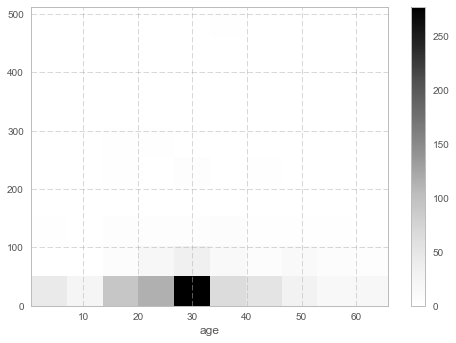

In [246]:
# scatter plot, plot, contour(f), hist2d
plt.hist2d(data.Age, data.Fare)
plt.xlabel('age')
plt.colorbar()
plt.show()

# Feature: one catergorical, one continous age v.s. survived
    

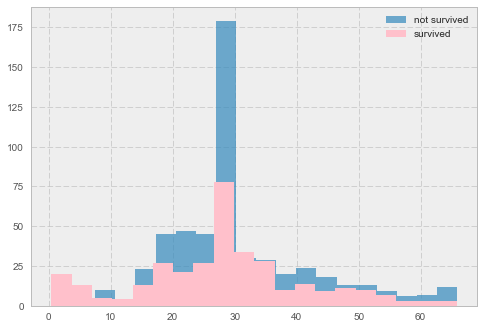

In [253]:
# useful way to try: groupby and multiple hist

plt.hist(data[data.Survived == 0]['Age'], label ='not survived',bins = 20, alpha = 0.7)
plt.hist(data[data.Survived == 1]['Age'], label ='survived', color = 'pink',bins = 20)
plt.legend()
plt.show()

In [ ]:
Also sns.barplot(x = catergorical, y = numerical)

# multiple variables
<font color = 'red'>twinx()</font>

a good example of mulpi axis
https://matplotlib.org/examples/pylab_examples/multiple_yaxis_with_spines.html

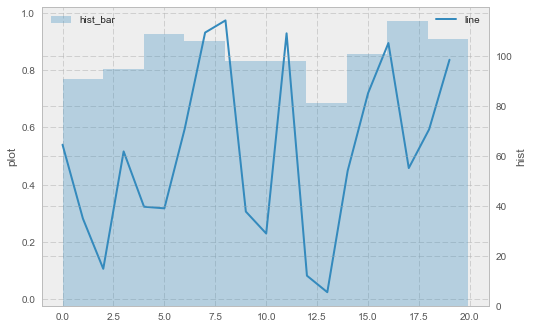

In [264]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.random.rand(20), label ='line')
ax1.set_ylabel('plot')
ax1.legend(loc ='best')

ax2 = ax1.twinx()
ax2.hist(np.random.rand(1000) * 20, alpha=0.3, label = 'hist_bar')
ax2.set_ylabel('hist')
ax2.legend(loc ='best')
plt.show()

# seaborn pairplot examples

https://www.youtube.com/watch?v=cpZExlOKFH4&index=5&list=PLgJhDSE2ZLxYlhQx0UfVlnF1F7OWF-9rp

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
X = iris.data
y = iris.target

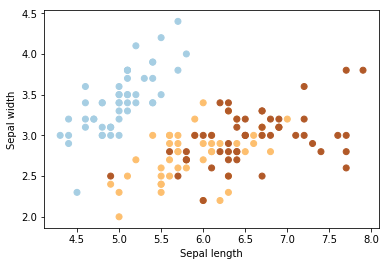

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

In [27]:
import seaborn as sns
sns.set_style("whitegrid")

In [17]:
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [20]:
sns.set()

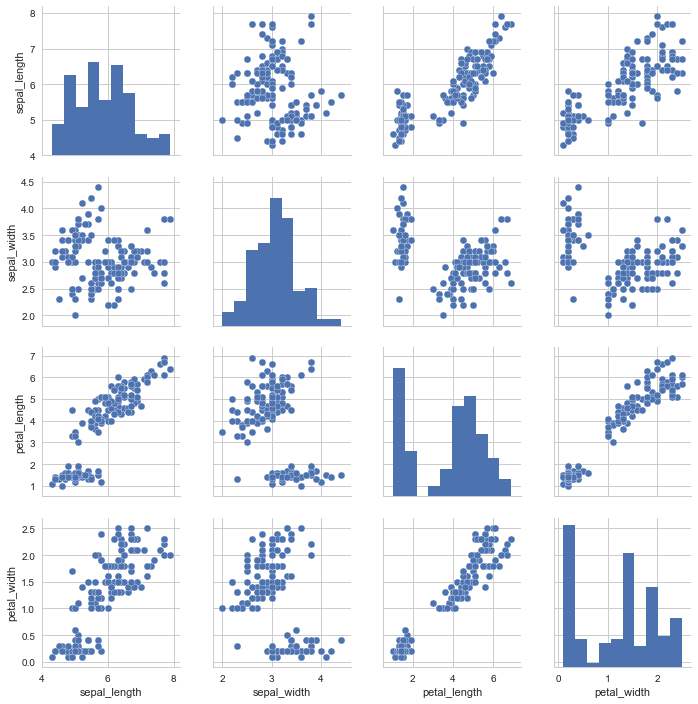

In [28]:
g = sns.pairplot(data = iris)

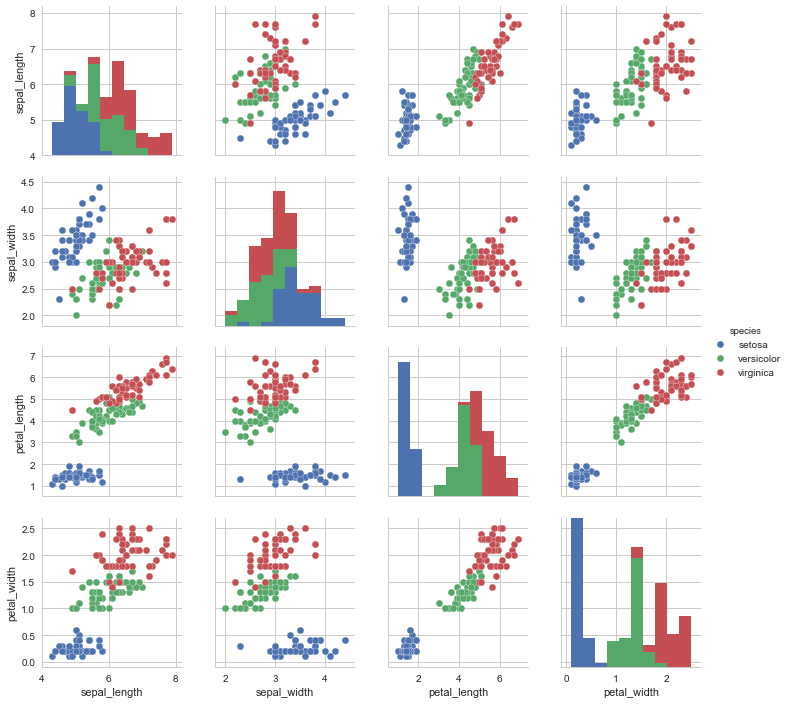

In [29]:
sns.pairplot(data = iris, hue = 'species')
sns.despine()

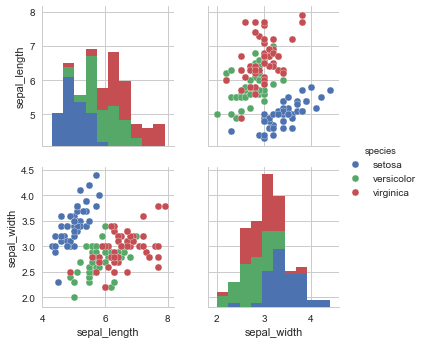

In [30]:
sns.pairplot(data = iris, vars = ['sepal_length','sepal_width'],hue = 'species')
sns.despine()

# change featuress on x and y axis --very handy!

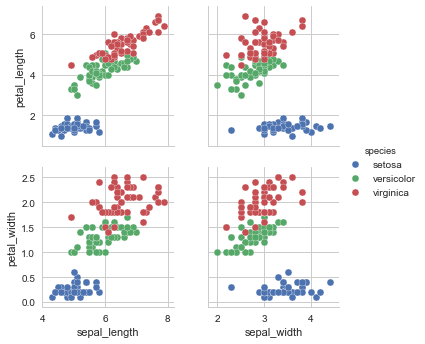

In [34]:

sns.pairplot(data = iris, x_vars = ['sepal_length','sepal_width'],
             y_vars = ['petal_length','petal_width'],
             hue = 'species')
sns.despine()

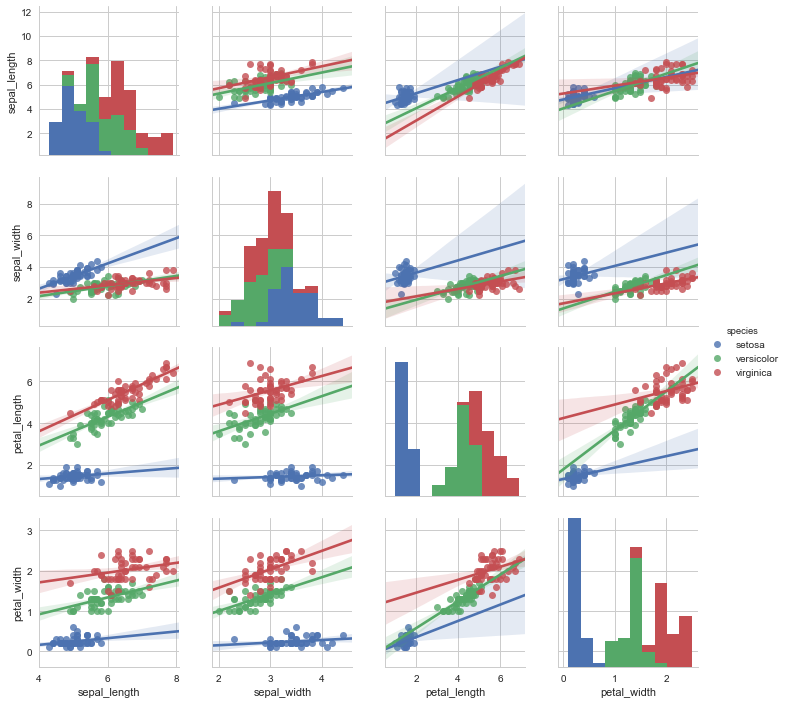

In [35]:
sns.pairplot(data = iris, kind = 'reg', hue = 'species' )
sns.despine()

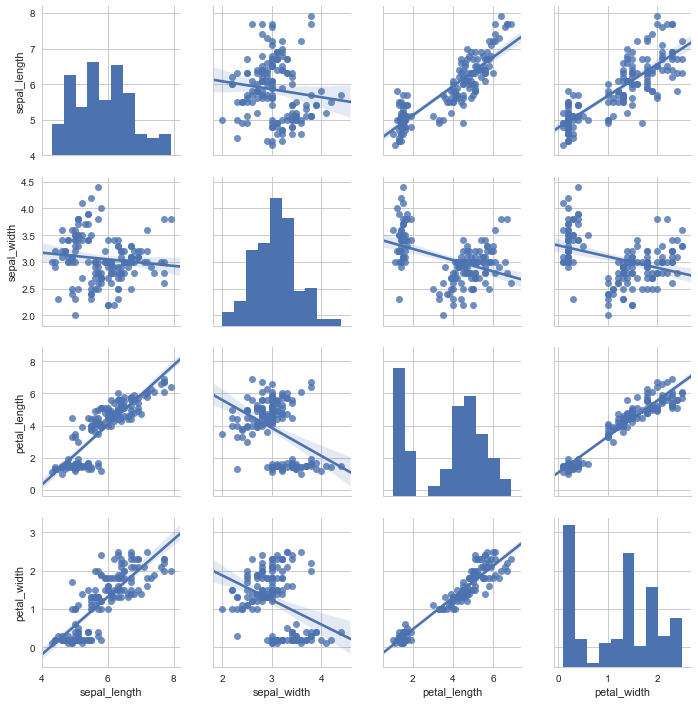

In [36]:
sns.pairplot(data = iris, kind = 'reg' )
sns.despine()

# Plot one scatter with different classes to do a regression

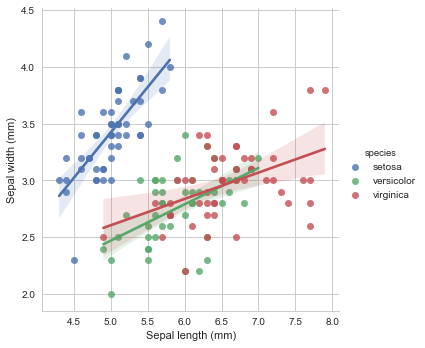

In [43]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")
sns.despine()

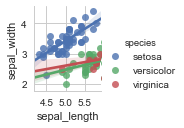

In [47]:
sns.pairplot(data = iris, x_vars= ['sepal_length'],
            y_vars = ['sepal_width'], hue = 'species',
            kind = 'reg' )
sns.despine()

# Plot boxplot

In [54]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


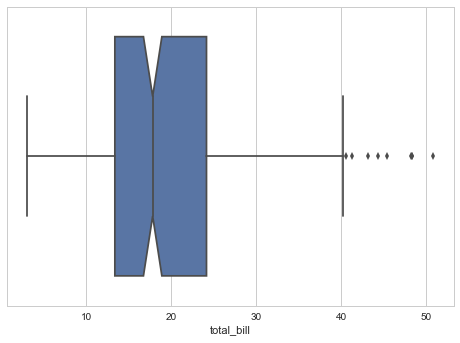

In [56]:
# boxplot- horizontal
sns.boxplot(x = tips.total_bill, notch = True)

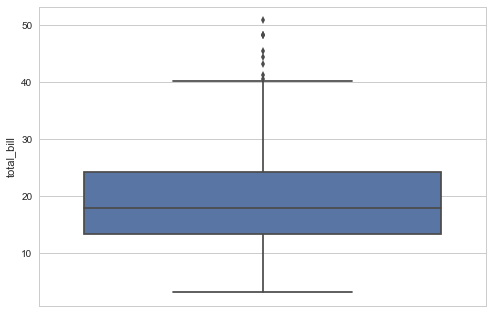

In [57]:
sns.boxplot(y = tips.total_bill)

In [58]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


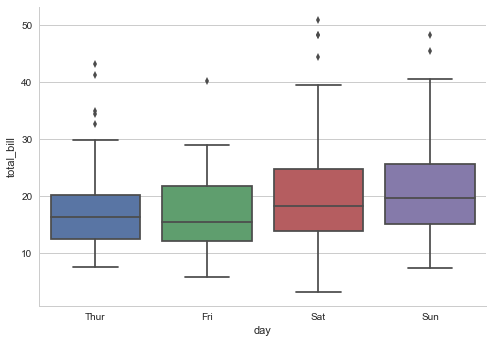

In [61]:
a = sns.boxplot(x = 'day', y = 'total_bill', data = tips)
sns.despine()

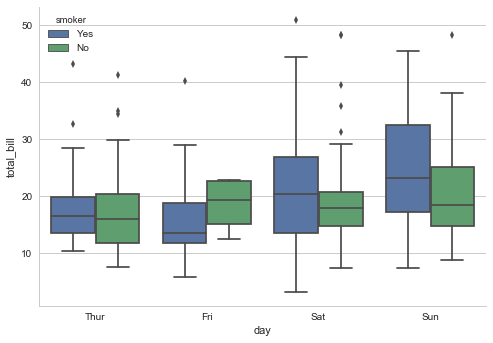

In [62]:
sns.boxplot(x = 'day', y = 'total_bill', 
            hue = 'smoker', data = tips
           )
sns.despine()

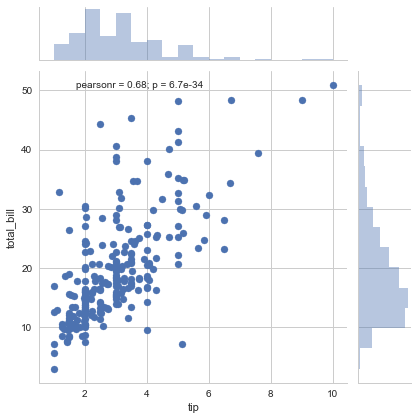

In [63]:
# Jointplot
sns.jointplot(x = 'tip', y = 'total_bill', data = tips)
sns.despine()

# Pointplot - useful parrellel plot to have better visualization

In [64]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


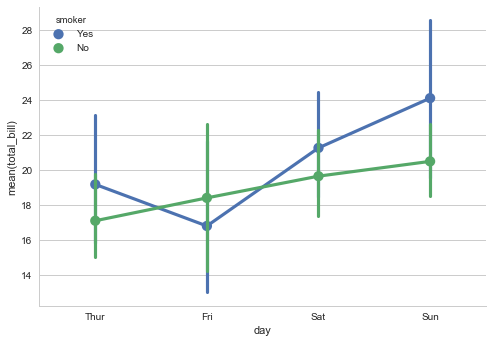

In [65]:
sns.pointplot(x = 'day', y = 'total_bill', data = tips
             , hue = 'smoker')
sns.despine()

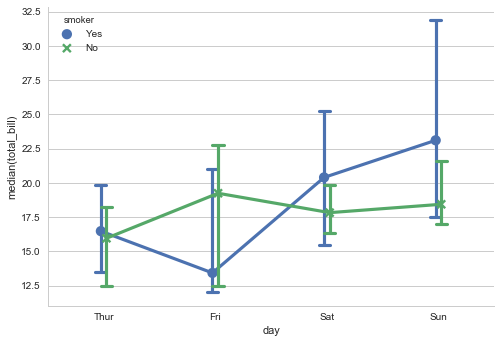

In [74]:
sns.pointplot(x = 'day', y = 'total_bill', data = tips
             , hue = 'smoker', dodge = True,
             markers = ['o','x'], join = True,
             estimator =np.median, capsize = 0.1) 
# dodge: True --slightly shift two classes
# join : False --remove line
# estimator : change the way to compute y.
# capsize: show the cap
sns.despine()

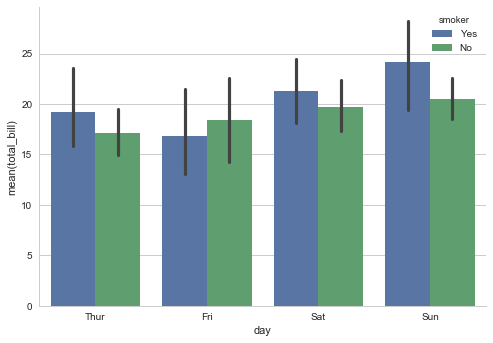

In [76]:
sns.barplot(x = 'day', y = 'total_bill', data = tips
             , hue = 'smoker') 
sns.despine()

# Factorplot

In [77]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


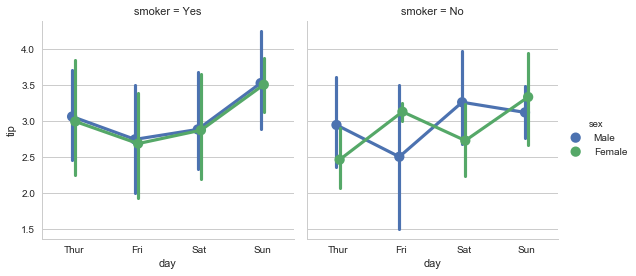

In [81]:
sns.factorplot(x = 'day', y ='tip',
              hue = 'sex', col = 'smoker',
               data = tips,dodge = True)
sns.despine()

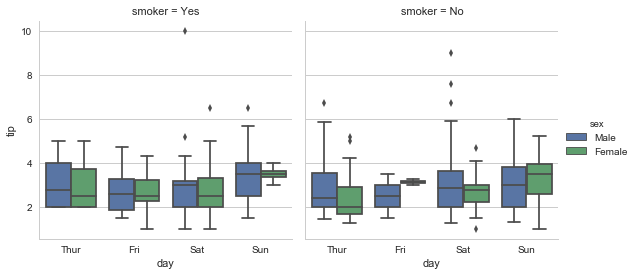

In [86]:
sns.factorplot(x = 'day', y ='tip',
              hue = 'sex', col = 'smoker',
               data = tips, kind = 'box')
sns.despine()

# sns lmplot and other regressions

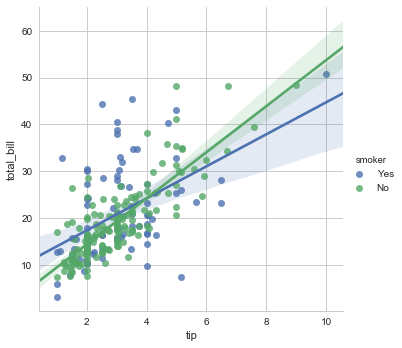

In [87]:
sns.lmplot(x = 'tip', y = 'total_bill',
          data = tips, hue = 'smoker')
sns.despine()

In [ ]:
# two numerical variables

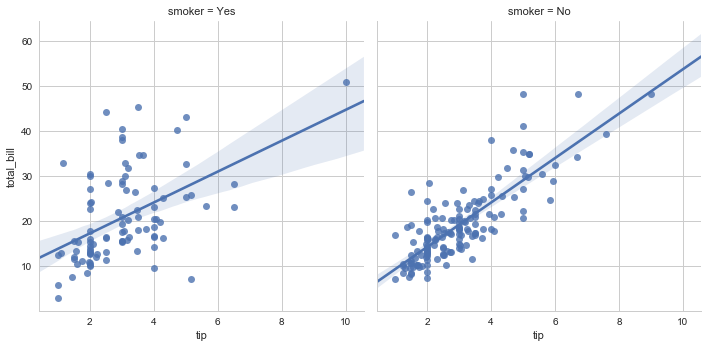

In [88]:
sns.lmplot(x = 'tip', y = 'total_bill',
          data = tips, col = 'smoker')
sns.despine()

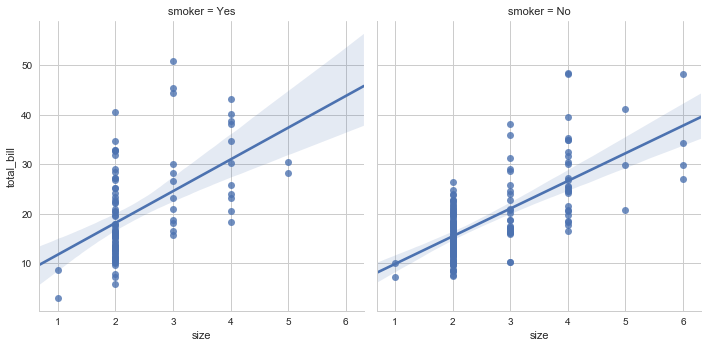

In [92]:
sns.lmplot(x = 'size', y = 'total_bill',
          data = tips, col = 'smoker')
sns.despine()

    # x- catergorical variable
    # y- numerical variable
    Very useful to get a mean of y on catergorical x

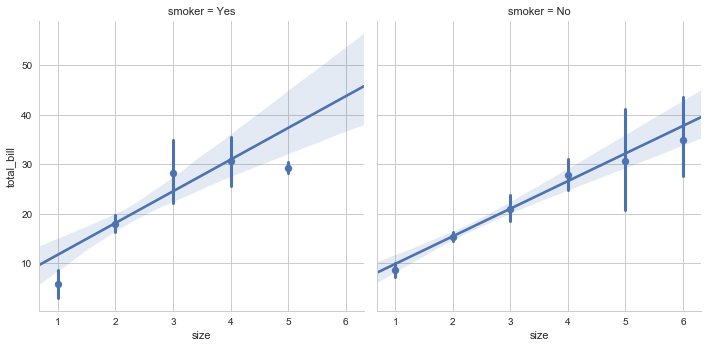

In [90]:
sns.lmplot(x = 'size', y = 'total_bill',
          data = tips, col = 'smoker',
          x_estimator = np.mean)
sns.despine()

In [ ]:
# more regression fit

In [93]:
anscombe = sns.load_dataset('anscombe')

In [94]:
anscombe.head(2)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95


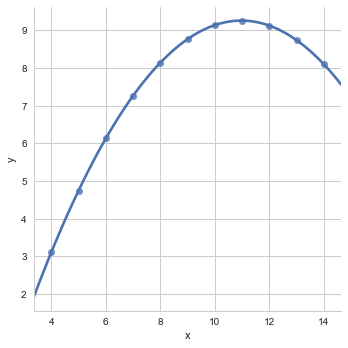

In [97]:
sns.lmplot(x = 'x', y = 'y', data = anscombe[anscombe.dataset == 'II']
          ,order = 2)
sns.despine()

In [98]:
tips['big_tip'] = (tips.tip /tips.total_bill) > 0.15

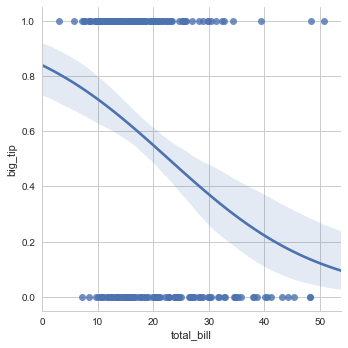

In [99]:
sns.lmplot(x = 'total_bill', y = 'big_tip',
          data = tips, logistic = True)
sns.despine()

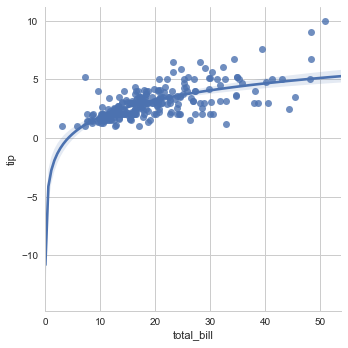

In [101]:
sns.lmplot(x = 'total_bill', y = 'tip',
          data = tips, logx = True)
# logx = True is adding a log transformation on x-axis and plot it 

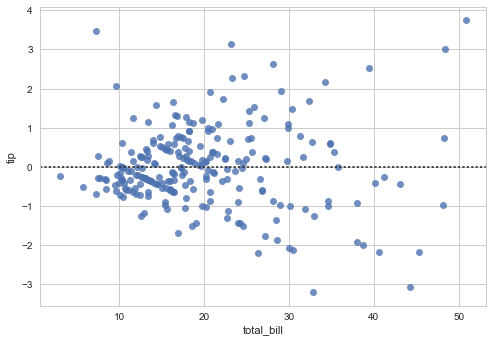

In [102]:
# residual plot
sns.residplot(x = 'total_bill', y = 'tip', data = tips)

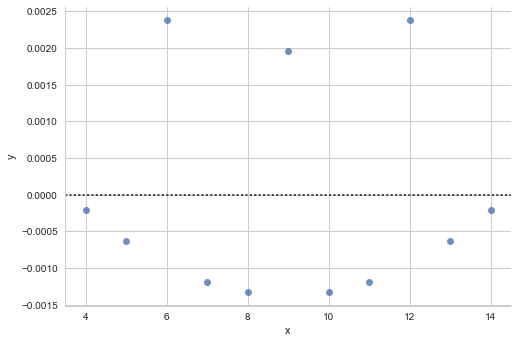

In [103]:
sns.residplot(x = 'x', y = 'y', data = anscombe[anscombe.dataset == 'II']
          ,order = 2)
sns.despine()

In [105]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True


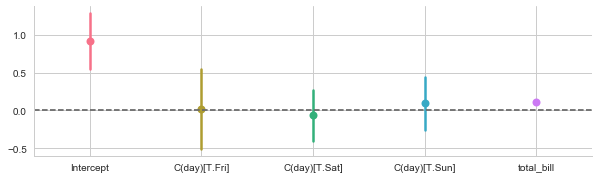

In [107]:
sns.coefplot("tip ~ total_bill + C(day)", data= tips, intercept = True)
sns.despine()